<a href="https://colab.research.google.com/github/ymuto0302/RW2025/blob/main/PRcurve.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

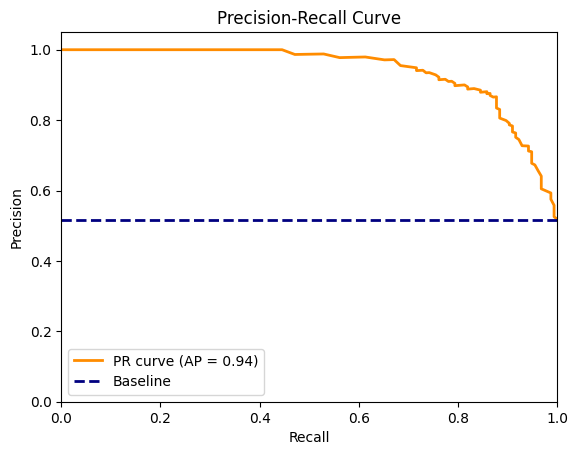

Average Precision: 0.9405


In [ ]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

# データセットの生成
X, y = make_classification(n_samples=1000, n_classes=2, n_features=20, random_state=42)

# データの分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# モデルの訓練
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# 予測確率の取得
y_pred_proba = clf.predict_proba(X_test)[:, 1]

# PR曲線の計算
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)

# 平均適合率（Average Precision）の計算
average_precision = average_precision_score(y_test, y_pred_proba)

# PR曲線のプロット
plt.figure()
plt.plot(recall, precision, color='darkorange', lw=2, label=f'PR curve (AP = {average_precision:.2f})')
plt.axhline(y=sum(y_test)/len(y_test), color='navy', lw=2, linestyle='--', label='Baseline')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()

print(f"Average Precision: {average_precision:.4f}")